## Question 1

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

### Part 4

In [4]:
def eigen_vals(t, U):
    # Create hamiltonian matrix
    H = np.matrix(
        [
            [0, 0, -t, -t],
            [0, 0, t, t],
            [-t, t, U, 0],
            [-t, +t, 0, U]
        ]
    )

    # Generate values and vectors
    H_values, H_vectors = np.linalg.eig(H)
    
    return H_values

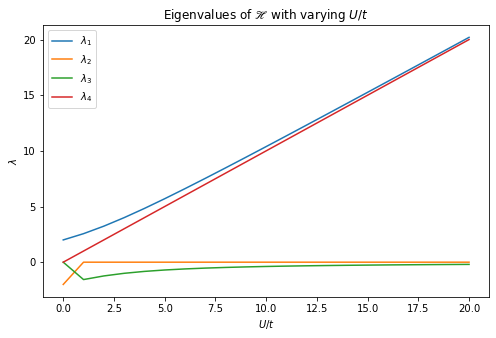

In [33]:
# Generate eigenvals for varying U/t and store them in an array
eigen_vals_array = []
spacing = 1
U_t_vals = np.arange(0, 20+spacing, spacing)

for val in np.arange(0, 20+spacing, spacing):
    eigen_vals_array.append(eigen_vals(1, val))

# Convert to numpy array to make manipulation easier
eigen_vals_array = np.array(eigen_vals_array)

fig = plt.figure(figsize=(8,5))

for index in range(0, 4):
    plt.plot(U_t_vals, eigen_vals_array[:, index], label=f'$\lambda_{index+1}$')
    
plt.title("Eigenvalues of $\mathscr{H}$ with varying $U/t$")
plt.xlabel("$U/t$")
plt.ylabel('$\lambda$')
plt.legend()

## Question 2

### Part 2

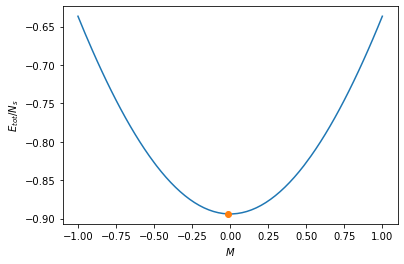

In [26]:
# Define the constants set out in (a)
N_s = 256 
j = np.arange(-N_s/2+1, N_s/2+1, 1)
k = (2*np.pi*j)/N_s
N = 128

t =1 
U=0.1

# Generate all N_up, N_down pairs
N_up = np.arange(0, N+1, 1)
N_down = np.flip(N_up)

# Generate each mean field
n_up = N_up/N_s
n_down = N_down/N_s

# Define energy eigenfunctions for each k 
e_k = -2*t*np.cos(k)
    
def E(k, N_up_val, N_down_val, n_up_val, n_down_val):
    '''
    Returns each E_sigma value summed up to the 
    N_sigma lowest energy state
    '''
    eMF_up = np.sort(e_k + U*n_down_val)
    eMF_down = np.sort(e_k + U*n_up_val)

    E_up = np.sum(eMF_up[:N_up_val])
    E_down = np.sum(eMF_down[:N_down_val])
    
    return E_up, E_down
    

# Calculate ground state energy for each M 
E_0_over_N_S = []
for index in range(N+1):
    E_up, E_down = E(k, N_up[index], N_down[index], n_up[index], n_down[index])
    new_E_0_over_N_S = (E_up+E_down)/N_s - (U*n_up[index]*n_down[index])
    E_0_over_N_S.append(new_E_0_over_N_S)

# Find the min E value and corresponding M
min_energy = min(E_0_over_N_S)
min_index = E_0_over_N_S.index(min_energy)
min_M = (N_up[min_index] - N_down[min_index])/N

# Calculate all M
M = (N_up - N_down)/N

fig = plt.figure()
plt.xlabel('$M$')
plt.ylabel('$E_{tot}/N_s$')
plt.plot(M, E_0_over_N_S)
plt.plot(min_M, min_energy, marker='o')